In [1]:
pip install openpyxl geopandas matplotlib mpl_toolkits

ERROR: Could not find a version that satisfies the requirement mpl_toolkits (from versions: none)
ERROR: No matching distribution found for mpl_toolkits
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np 
import panel as pn
import hvplot.pandas
import geopandas as gpd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable


In [3]:
df = pd.read_excel('Quimica.xlsx')
df


,Localidad,Promedio PH,Promedio Turbidez,semana,Latitud,Longitud
0,CHAPINERO,0.0,0.0,1,4.65690,-74.04670
1,CIUDAD BOLÍVAR,6.7,1.7,1,4.50660,-74.15390
2,ENGATIVÁ,5.5,0.7,1,4.70710,-74.10720
3,FONTIBÓN,7.5,1.8,1,4.68320,-74.14790
4,KENNEDY,0.0,0.0,1,4.62680,-74.15730
...,...,...,...,...,...,...
116,SAN CRISTOBAL,6.7,4.2,11,4.54630,-74.08830
117,SOACHA,0.0,0.0,11,4.57937,-74.21682
118,TUNJUELITO,7.3,5.7,11,4.58750,-74.14070
119,USAQUÉN,0.0,0.0,11,4.74850,-74.03120


In [4]:
df.head()


,Localidad,Promedio PH,Promedio Turbidez,semana,Latitud,Longitud
0,CHAPINERO,0.0,0.0,1,4.6569,-74.0467
1,CIUDAD BOLÍVAR,6.7,1.7,1,4.5066,-74.1539
2,ENGATIVÁ,5.5,0.7,1,4.7071,-74.1072
3,FONTIBÓN,7.5,1.8,1,4.6832,-74.1479
4,KENNEDY,0.0,0.0,1,4.6268,-74.1573


In [5]:
idf = df.interactive();

In [6]:
week_slider = pn.widgets.IntSlider(name='semana', start=1, end=11, step=1, value=1)
week_slider

IntSlider(end=11, name='semana', start=1, value=1)

In [7]:
yaxis = pn.widgets.RadioButtonGroup(
    name='Y axis', 
    options=['Promedio PH', 'Promedio Turbidez',],
    button_type='success'
)

In [8]:
Localidad = ['Ciudad Bolivar', 'Engativá', 'Fontibón', 'Kennedy', 'Rafael Uribe Uribe', 'San Cristóbal Sur', 'Soacha', 'Tunjuelito', 'Usaquén', 'La Calera, Cundinamarca']


In [9]:
semanas = (
    idf[
        (idf.semana == week_slider)
    ]
    .groupby(['Localidad', 'semana'])[yaxis].mean()
    .to_frame()
    .reset_index()
    .sort_values(by='semana')  
    .reset_index(drop=True)
)

In [10]:
semanas

In [11]:
co2_plot = semanas.hvplot(x = 'Localidad', by='semana', y=yaxis,line_width=2, title="PH Y TURBIDEZ POR LOCALIDAD")
co2_plot

In [12]:
table = semanas.pipe(pn.widgets.Tabulator, pagination='remote', page_size = 10, sizing_mode='stretch_width') 
table


pn.extension('tabulator')



In [13]:
promedio_ph_vs_turbidez_scatterplot_pipeline = (
    idf[idf['semana'] == week_slider]
    .groupby(['Localidad', 'semana'])
    .agg({
        'Promedio PH': 'mean',
        'Promedio Turbidez': 'mean',
    })
    .reset_index()
    .sort_values(by='semana')
    .reset_index(drop=True)
)

In [14]:
promedio_ph_vs_turbidez_scatterplot_pipeline

In [15]:
promedio_ph_vs_turbidez_scatterplot = promedio_ph_vs_turbidez_scatterplot_pipeline.hvplot(x='Promedio PH', 
                                                                y='Promedio Turbidez', 
                                                                by='semana', 
                                                                size=80, kind="scatter", 
                                                                alpha=0.7,
                                                                legend=False, 
                                                                height=500, 
                                                                width=500)
promedio_ph_vs_turbidez_scatterplot

In [16]:
yaxis_co2_source = pn.widgets.RadioButtonGroup(
    name='Y axis', 
    options=['Promedio PH', 'Promedio Turbidez'], 
    button_type='success'
)

Localidad = ['Ciudad Bolivar', 'Engativá', 'Fontibón', 'Kennedy', 'Rafael Uribe Uribe', 'San Cristóbal Sur', 'Soacha', 'Tunjuelito', 'Usaquén', 'La Calera, Cundinamarca']

co2_source_bar_pipeline = (
    idf[
        (idf.semana == week_slider) 
    ]
    .groupby(['Localidad', 'semana'])[yaxis].sum()
    .to_frame()
    .reset_index()
    .sort_values(by='semana')  
    .reset_index(drop=True)
)


In [17]:
co2_source_bar_plot = co2_source_bar_pipeline.hvplot(kind='bar', 
                                                     x='Localidad', 
                                                     y=yaxis, 
                                                     title='PH por localidad')
co2_source_bar_plot

/var/folders/y2/tx7__rwx1_df3_chry8fqx180000gn/T/ipykernel_1493/2848339306.py:11: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label in zip(poligonos.centroid.x, poligonos.centroid.y, poligonos['Nombre de la localidad']):


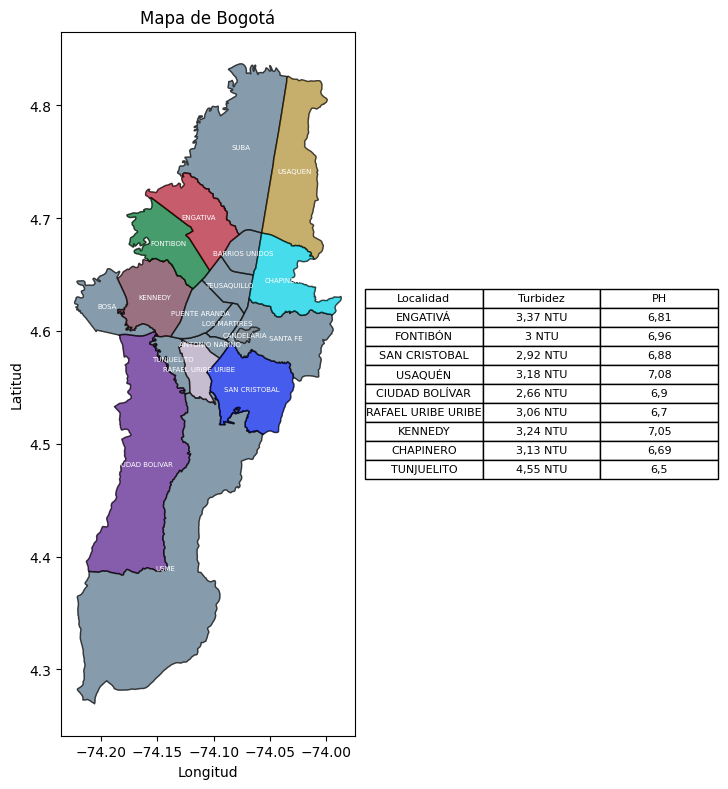

In [18]:
poligonos = gpd.read_file("Poligonos.geojson")

# Eliminar la fila correspondiente a Usme
#poligonos = poligonos[poligonos['Nombre de la localidad'] != 'USME']


fig, ax = plt.subplots(figsize=(10, 8))
poligonos.plot(ax=ax, edgecolor='black', alpha=0.5)

# Agregar los nombres de las localidades como etiquetas
for x, y, label in zip(poligonos.centroid.x, poligonos.centroid.y, poligonos['Nombre de la localidad']):
    ax.text(x, y, label, fontsize=5, ha='center', va='center', color='white')  # Cambiar el color del texto a azul

# Personalizar el mapa
ax.set_title("Representacion grafica de Bogota  y sus localidades")
ax.set_xlabel("Longitud")
ax.set_ylabel("Latitud")

# Crear la tabla de datos
table_data = [["ENGATIVÁ", "3,37 NTU", "6,81"],
              ["FONTIBÓN", "3 NTU", "6,96"],
              ["SAN CRISTOBAL", "2,92 NTU", "6,88"],
              ["USAQUÉN", "3,18 NTU", "7,08"],
              ["CIUDAD BOLÍVAR", "2,66 NTU", "6,9"],
              ["RAFAEL URIBE URIBE", "3,06 NTU", "6,7"],
              ["KENNEDY", "3,24 NTU", "7,05"],
              ["CHAPINERO", "3,13 NTU", "6,69"],
              ["TUNJUELITO", "4,55 NTU", "6,5"]]

# Crea tabla al lado
divider = make_axes_locatable(ax)
ax_table = divider.append_axes("right", size="120%", pad=0.1)

ax_table.axis("off")

# Agregar la tabla de datos
table = ax_table.table(cellText=table_data, colLabels=["Localidad", "Turbidez", "PH"], loc="center", cellLoc="center")


table.auto_set_font_size(False)
table.set_fontsize(8)
color_dict = {
    "ENGATIVA": "red",
    "FONTIBON": "green",
    "SAN CRISTOBAL": "blue",
    "USAQUEN": "orange",
    "CIUDAD BOLIVAR": "purple",
    "RAFAEL URIBE URIBE": "pink",
    "KENNEDY": "brown",
    "CHAPINERO": "cyan",
    "TUNJUELITO": "gray"
}

for idx, row in poligonos.iterrows():
    localidad = row['Nombre de la localidad']
    color = color_dict.get(localidad, 'gray')
    if row.geometry.geom_type == 'MultiPolygon':
        for polygon in row.geometry.geoms:
            x, y = polygon.exterior.xy
            ax.fill(x, y, color=color, edgecolor='black', alpha=0.5)
    else:
        x, y = row.geometry.exterior.xy
        ax.fill(x, y, color=color, edgecolor='black', alpha=0.5)


plt.tight_layout()
#plt.figure(figsize=(6, 4))# Aspect ratio of 8:5.33 for 600px width
plt.savefig('mapa.png', dpi=300, bbox_inches='tight')
plt.show()

In [19]:
mapa_image = pn.pane.PNG('mapa.png')
mapa_image.width = 850
mapa_image.height = 600

In [20]:
template = pn.template.FastListTemplate(
    title='Comparativa de PH y Turbidez  ', 
    sidebar=[pn.pane.Markdown("# Comparativa en la ciudad de Bogota del PH Y la turbidez"), 
             pn.pane.Markdown("####Este panel presenta la comparativa durante 11 semanas de los datos del pH y turbidez a traves de 11 semanas en la ciudad de Bogota en el año 2023 con el objetivo de analizar los cambios en la lluvia asi poder observar si la lluvia tiene rangos de acidez segun la norma el agua potable debe estar entre 6.5 y 8.5 para ser potable en cuanto a la turbidez debe ser de 1 NTU para considerarse potable, en este panel existe una barra para cabiar entre semanas y poder visualizar los datos semana a semana."), 
             
             pn.pane.Markdown("## Settings"),   
             week_slider],
    main=[
        pn.Row(
            pn.Column(yaxis,
                semanas.panel(width=700), 
                mapa_image
                
            ),
            pn.Column(
                pn.Row(
                    yaxis,co2_plot.panel(width=600), 
                    
                ),
            yaxis,co2_source_bar_plot.panel(width=600)
            )
        )
    ],
    accent_base_color="#88d8b0",
    header_background="#88d8b0",
)
template.show()
#template.servable();







Launching server at http://localhost:49364
